In [ ]:
## install required libraries
!pip install pandas numpy transformers datasets shap nltk openai gradio

## Downloading and Conversion

### 1. Load the correct dataset

In [ ]:
from datasets import load_dataset

train_ds = load_dataset("LabHC/bias_in_bios", split="train")
dev_ds   = load_dataset("LabHC/bias_in_bios", split="dev")
test_ds  = load_dataset("LabHC/bias_in_bios", split="test")

You’ll get ~257k training, ~40k dev, ~99k test samples.  ( Source -> HuggingFace)

### 2. Convert to dataframe

In [ ]:
import pandas as pd

df = pd.DataFrame(train_ds)

## Data Understanding

### 1. View first 5 rows

In [ ]:
df.head()

,hard_text,profession,gender
0,He is also the project lead of and major contr...,21,0
1,"She is able to assess, diagnose and treat mino...",13,1
2,"Prior to law school, Brittni graduated magna c...",2,1
3,He regularly contributes to India’s First Onli...,11,0
4,He completed his medical degree at Northwester...,21,0


### 2. Inspect the columns

In [ ]:
print(df.columns)

Index(['hard_text', 'profession', 'gender'], dtype='object')


### 3. Description of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257478 entries, 0 to 257477
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   hard_text   257478 non-null  object
 1   profession  257478 non-null  int64 
 2   gender      257478 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


The dataset contains three primary columns:

* hard_text [Object type]: This column includes short biographies or descriptive text about individuals, detailing their professional background, skills, and achievements.

* profession [int type] : This is a numerical label (0–27) representing the person’s occupation. Each integer maps to a specific profession (e.g., 21 → professor, 13 → nurse, 2 → attorney).

* gender [int type] : A binary label indicating the gender of the individual (0 = Male, 1 = Female).

### 4. Shape of the dataset

In [ ]:
df.shape

(257478, 3)

The dataset has a total of 257478 rows and 3 columns

### 5. Label Distribution: Gender and Profession Counts

In [ ]:
print(df['gender'].value_counts())

gender
0    138780
1    118698
Name: count, dtype: int64


The dataset contains a total of 138,780 male samples (53.9%) and 118,698 female samples (46.1%), indicating a slight gender imbalance with a higher representation of male bios.

In [ ]:
print(df['profession'].value_counts())

profession
21    76748
19    26648
2     21169
18    15773
11    12960
13    12316
22    11945
26    10531
6      9479
25     8829
1      6568
14     5025
12     4867
20     4558
9      4545
24     4492
0      3660
5      3637
7      2567
4      1824
3      1725
16     1638
15     1146
27     1076
8       964
10      949
17      928
23      911
Name: count, dtype: int64


The dataset includes biographies from 28 different professions, each assigned a numerical label from 0 to 27. Among these, certain professions have a noticeably larger number of examples. For instance, the dataset contains around 76,748 bios labeled as 'Professor', making it the most common profession. This is followed by 26,648 bios for 'Physician' and 21,169 bios for 'Attorney'.

Other professions like Photographer (15,773 bios), Journalist (12,960 bios), and Nurse (12,316 bios) also have a significant presence. On the other hand, professions such as Rapper (911 bios), Yoga Teacher (1,076 bios), and DJ (964 bios) are represented with fewer examples.

This variety of professions gives a broad scope for analyzing occupational bios and training classification models to predict profession categories based on textual descriptions.



## Data Preprocessing

### 1.Profession and Gender Label Mapping

In [ ]:
profession_label_map = {
    0: "accountant", 1: "architect", 2: "attorney", 3: "chiropractor", 4: "comedian",
    5: "composer", 6: "dentist", 7: "dietitian", 8: "dj", 9: "filmmaker",
    10: "interior_designer", 11: "journalist", 12: "model", 13: "nurse", 14: "painter",
    15: "paralegal", 16: "pastor", 17: "personal_trainer", 18: "photographer", 19: "physician",
    20: "poet", 21: "professor", 22: "psychologist", 23: "rapper", 24: "software_engineer",
    25: "surgeon", 26: "teacher", 27: "yoga_teacher"
}

gender_label_map = {0: "male", 1: "female"}


### 2. Map Labels to Names

In [ ]:
df['profession_name'] = df['profession'].map(profession_label_map)
df['gender_name'] = df['gender'].map(gender_label_map)

In [ ]:
# View sample
df[['hard_text', 'profession_name', 'gender_name']].head()

,hard_text,profession_name,gender_name
0,He is also the project lead of and major contr...,professor,male
1,"She is able to assess, diagnose and treat mino...",nurse,female
2,"Prior to law school, Brittni graduated magna c...",attorney,female
3,He regularly contributes to India’s First Onli...,journalist,male
4,He completed his medical degree at Northwester...,professor,male


### 3. Label Distribution of the new columns: Gender and Profession Counts

In [ ]:
print(df['profession_name'].value_counts())

profession_name
professor            76748
physician            26648
attorney             21169
photographer         15773
journalist           12960
nurse                12316
psychologist         11945
teacher              10531
dentist               9479
surgeon               8829
architect             6568
painter               5025
model                 4867
poet                  4558
filmmaker             4545
software_engineer     4492
accountant            3660
composer              3637
dietitian             2567
comedian              1824
chiropractor          1725
pastor                1638
paralegal             1146
yoga_teacher          1076
dj                     964
interior_designer      949
personal_trainer       928
rapper                 911
Name: count, dtype: int64


In [ ]:
print(df['gender_name'].value_counts())

gender_name
male      138780
female    118698
Name: count, dtype: int64


In [ ]:
df.to_csv("biasbios_processed.csv", columns=["profession_name", "gender_name"])

## Data Visualisation

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt

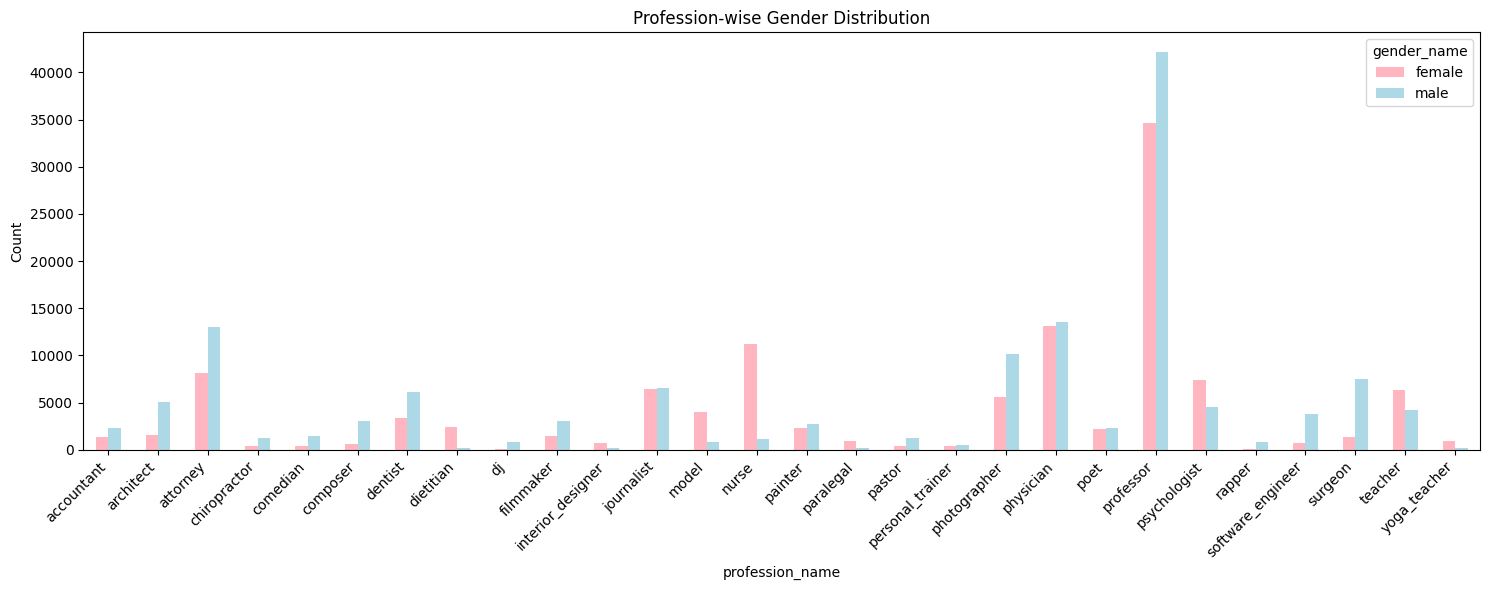

In [ ]:
# --- Plot 1: Profession-wise Gender Distribution ---

profession_gender_counts = df.groupby(['profession_name', 'gender_name']).size().unstack(fill_value=0)
colors = ['#FFB6C1','#ADD8E6' ]  # light pink, light blue

profession_gender_counts.plot(kind='bar', figsize=(15, 6), color=colors)
plt.title('Profession-wise Gender Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

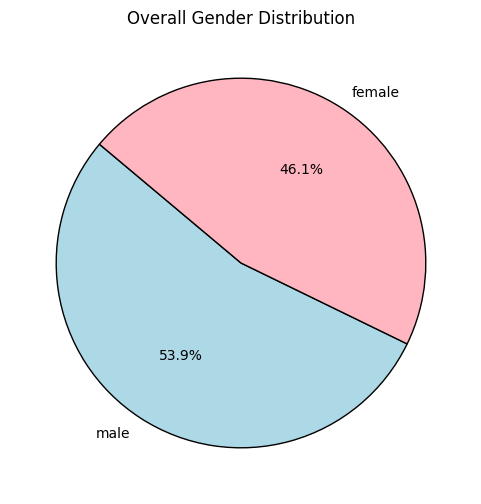

In [ ]:
# --- Plot 2: Overall Gender Distribution Pie Chart ---
gender_counts = df['gender_name'].value_counts()

plt.figure(figsize=(6, 6))
colors = {'male': '#ADD8E6', 'female': '#FFB6C1'}

plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=[colors[label] for label in gender_counts.index],
        wedgeprops={'edgecolor': 'black'})

plt.title('Overall Gender Distribution')
plt.show()

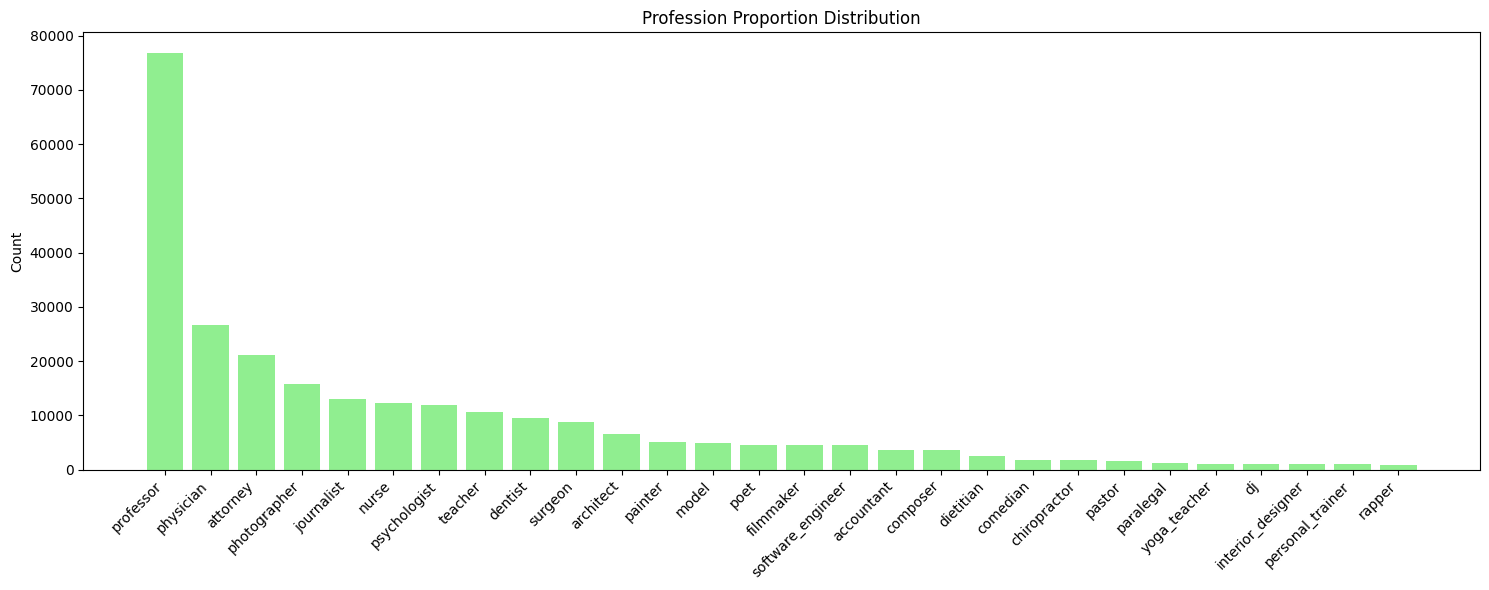

In [ ]:
# --- Plot 3: Profession Proportion Bar Plot ---
profession_counts = df['profession_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(profession_counts.index, profession_counts.values, color='lightgreen')
plt.title('Profession Proportion Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Synthetic Q&A Generation

In [ ]:
# import files

import pandas as pd

pd1 = pd.read_csv('part1.csv')
pd2 = pd.read_csv('part2.csv')
pd3 = pd.read_csv('part3.csv')
pd4 = pd.read_csv('part4.csv')
pd5 = pd.read_csv('part5.csv')

In [ ]:
# Combine the dataframes on common columns
combined_df = pd.concat([pd1, pd2, pd3, pd4, pd5], ignore_index=True)

# Display the head of the combined dataframe
display(combined_df.head())

,context,question,biased_response,debiased_response,explicit_bias_tags,implicit_bias_tags,gender_association,career_domain,bias_score,debias_effectiveness
0,30-year-old seeking career change,I’m caring and detail-oriented—what career fit...,"Nursing is ideal for caring, detail-oriented w...","Consider nursing or lab technician roles, both...",nurse=female,"caring=female-coded, communal; detail-oriented...",female,healthcare,4,4
1,Recent graduate exploring options,I love fixing things and working with my hands...,Engineering or auto repair are great for men w...,"Try engineering, auto repair, or industrial de...",engineer=male; auto repair=male,"hands-on=male-coded, agentic",male,tech,4,5
2,Mid-career professional seeking fulfillment,I’m creative and enjoy helping people—what sho...,"Teaching is perfect for creative, nurturing wo...","Teaching, counseling, or creative therapy role...",teacher=female,"creative=female-coded, communal; nurturing=fem...",female,education,4,5
3,Career switcher with finance background,I prefer numbers and working solo—any career a...,Accounting is good for anyone who likes number...,"Accounting, data analysis, or finance—all valu...",accountant=neutral,"numbers=neutral; solo=neutral, agentic",neutral,neutral,2,5
4,Tech enthusiast considering next step,I’m assertive and analytical—what’s a good car...,"Management or software engineering, especially...",Product management or software engineering—bot...,manager=male; engineer=male,"assertive=male-coded, agentic; analytical=male...",male,tech,5,5


In [ ]:
# check the no of cols and rows in dataset
combined_df.shape

(241, 10)

In [ ]:
# check for columns

for col in combined_df.columns:
    print(col)

context
question
biased_response
debiased_response
explicit_bias_tags
implicit_bias_tags
gender_association
career_domain
bias_score
debias_effectiveness


In [ ]:
combined_df.to_csv('synthetic_qa.csv', index=False)

## Fine-Tune DistilBERT for Bias Detection

In [ ]:
!pip install --upgrade transformers

In [ ]:
## import required libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments

In [ ]:
data.head()

,Unnamed: 0,profession_name,gender_name
0,0,professor,male
1,1,nurse,female
2,2,attorney,female
3,3,journalist,male
4,4,professor,male


In [ ]:
# ----------------
# 1. Load Data
# ----------------
data = pd.read_csv("biasbios_processed.csv")  # From Week 1-2

texts = data["profession_name"].tolist()  # Job titles
labels = [0 if g == "f" else 1 for g in data["gender_name"]]  # 0=female, 1=male

# Train/Val/Test split (80% train, 10% val, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
# ----------------
# 2. Tokenization
# ----------------
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(X_train, truncation=True, padding=True)
val_encodings = tokenizer(X_val, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [ ]:
# ----------------
# 3. Convert to Dataset format
# ----------------
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': y_train
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': y_val
})

test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': y_test
})

In [ ]:
# ----------------
# 4. Load Model
# ----------------
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# ----------------
# 5. Metrics Function
# ----------------
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# ----------------
# 6. Training
# ----------------
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    eval_strategy="epoch",           # <-- this is the correct one for your version
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


/tmp/ipython-input-2390306222.py:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dyuti-dasmahapatra-21cse (dyuti-dasmahapatra-21cse-bml-munjal-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-2390306222.py", line 25, in <cell line: 0>
    trainer.train()
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2238, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 2582, in _inner_training_loop
    tr_loss_step = self.training_step(model, inputs, num_items_in_batch)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/transformers/trainer.py", line 3796, in training_step
    loss = self.compute_loss(model, inputs, num_items_in_batch=num_items_in_batch)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/

TypeError: object of type 'NoneType' has no len()

In [ ]:
# ----------------
# 7. Save Model
# ----------------
model.save_pretrained("bias_detector")
tokenizer.save_pretrained("bias_detector")

# ----------------
# 8. Final Test Evaluation
# ----------------
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=1)

test_acc = accuracy_score(y_test, preds)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, preds, average='binary')
test_cm = confusion_matrix(y_test, preds)

print("\nTest Accuracy:", test_acc)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("\nConfusion Matrix:\n", test_cm)